Comparaison taille des classes SEGPA en REP/REP+/zone "normale"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('lv-college.csv', sep = ';')
df.columns

C:\Users\chris\AppData\Local\Temp\ipykernel_49268\441065526.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lv-college.csv', sep = ';')


Index(['num_ligne', 'Rentrée scolaire', 'Code région académique',
       'Région académique', 'Code académie', 'Académie', 'Code département',
       'Département', 'Code postal', 'Commune', 'UAI',
       'Dénomination principale', 'Patronyme', 'Secteur', 'REP', 'REP +',
       'Nombre d'élèves total', 'Nombre d'élèves total hors Segpa hors ULIS',
       'Nombre d'élèves total Segpa', 'Nombre d'élèves total ULIS',
       '6èmes total', '6èmes hors Segpa hors ULIS', '6èmes Segpa',
       '6èmes ULIS', '6èmes filles', '6èmes garçons', '6èmes LV1 allemand',
       '6èmes LV1 anglais', '6èmes LV1 espagnol', '6èmes LV1 autres langues',
       '6èmes LV2 allemand', '6èmes LV2 anglais', '6èmes LV2 espagnol',
       '6èmes LV2 italien', '6ème LV2 autres langues', '5èmes total',
       '5èmes hors Segpa hors ULIS', '5èmes Segpa', '5èmes ULIS',
       '5èmes filles', '5èmes garçons', '5èmes LV1 allemand',
       '5èmes LV1 anglais', '5èmes LV1 espagnol', '5èmes LV1 autres langues',
       '5èmes

In [4]:
segpa_rep = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP', aggfunc = 'sum')

In [5]:
segpa_replus = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP +', aggfunc = 'sum')

In [6]:
display(segpa_rep)
display(segpa_replus)

,Nombre d'élèves total Segpa
REP,
0,347969
1,89144


,Nombre d'élèves total Segpa
REP +,
0,379835
1,57278


In [7]:
rep = segpa_rep.loc[1, "Nombre d'élèves total Segpa"]
replus = segpa_replus.loc[1, "Nombre d'élèves total Segpa"]
clas = segpa_rep.loc[0, "Nombre d'élèves total Segpa"] + segpa_rep.loc[1, "Nombre d'élèves total Segpa"] - (rep+replus)

segpa = pd.DataFrame({"REP" : [rep], "REP +" : [replus], "classique" : [clas]})

In [8]:
segpa

,REP,REP +,classique
0,89144,57278,290691


In [9]:
#sns.histplot(data=segpa, y = "Nombre d'élèves total Segpa")
plt.hist(segpa, y = "Nombre d'élèves total Segpa")

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([ 57278. ,  80619.3, 103960.6, 127301.9, 150643.2, 173984.5,
        197325.8, 220667.1, 244008.4, 267349.7, 290691. ]),
 <a list of 3 BarContainer objects>)

Error in callback <function _draw_all_if_interactive at 0x000001F829153380> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: "Nombre d'élèves total Segpa"

ConversionError: Failed to convert value(s) to axis units: "Nombre d'élèves total Segpa"

<Figure size 640x480 with 1 Axes>

In [10]:
#création nouvelle colonne Christelle pour pouvoir travailler sur la taille du collège

df['taille']=pd.cut(df["Nombre d'élèves total"], bins=[0,100,300,500,10000,100000], labels=['très petit','petit','moyen','grand','très grand'])
df.head(5)



,num_ligne,Rentrée scolaire,Code région académique,Région académique,Code académie,Académie,Code département,Département,Code postal,Commune,...,3èmes LV1 allemand,3èmes LV1 anglais,3èmes LV1 espagnol,3èmes LV1 autres langues,3èmes LV2 allemand,3èmes LV2 anglais,3èmes LV2 espagnol,3èmes LV2 italien,3èmes LV2 autres langues,taille
0,30005,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78400,CHATOU,...,0,125,0,0,22,0,102,1,0,grand
1,30009,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78310,COIGNIERES,...,0,89,0,0,5,0,84,0,0,moyen
2,30011,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78700,CONFLANS-SAINTE-HONORINE,...,0,200,0,0,12,0,156,17,0,grand
3,30016,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78990,ELANCOURT,...,0,140,0,0,10,0,117,0,13,grand
4,30017,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78990,ELANCOURT,...,0,133,0,0,17,0,116,0,0,grand


In [11]:
#création colonne Christelle pourcentage èlèves en ULIS, en SEGPA

df["pourcentage élèves en SEGPA"]=(df["Nombre d'élèves total Segpa"]/df["Nombre d'élèves total"])*100
df["pourcentage élèves en ULIS"]=df["Nombre d'élèves total ULIS"]/df["Nombre d'élèves total"]*100
df.head(4)

maxi=df["pourcentage élèves en SEGPA"].idxmax()
df.loc[maxi,["Nombre d'élèves total","Nombre d'élèves total Segpa"]]



SyntaxError: incomplete input (74247412.py, line 10)

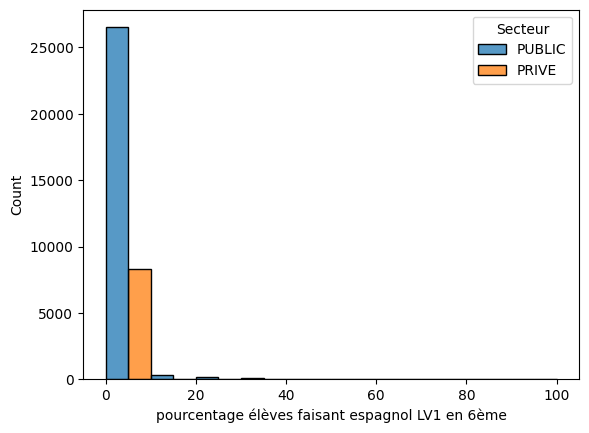

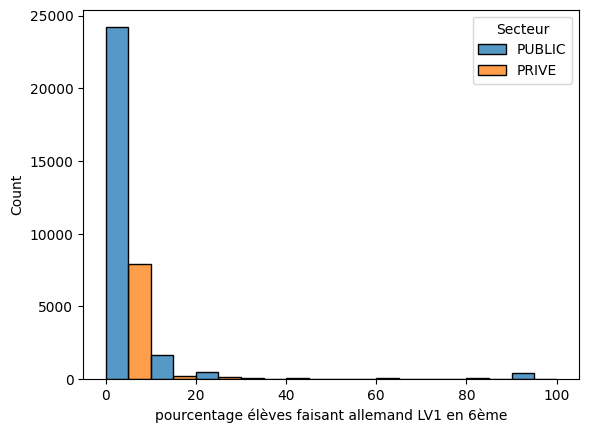

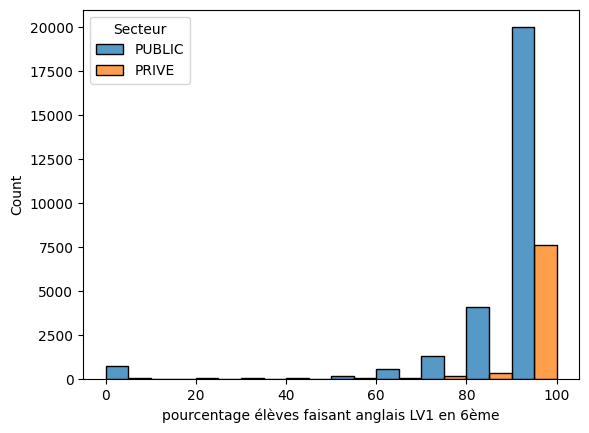

In [47]:
# création par Christelle colonne correspondant au pourcentage d'élèves faisant allemand LV1

df["pourcentage élèves faisant allemand LV1 en 6ème"]=df["6èmes LV1 allemand"]/df["6èmes total"]*100
df["pourcentage élèves faisant espagnol LV1 en 6ème"]=df["6èmes LV1 espagnol"]/df["6èmes total"]*100
df["pourcentage élèves faisant anglais LV1 en 6ème"]=df["6èmes LV1 anglais"]/df["6èmes total"]*100


sns.histplot(data=df,x="pourcentage élèves faisant espagnol LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant allemand LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant anglais LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge",common_norm=True)
plt.show()

In [18]:
#print(maxi)
#df.plot(y="pourcentage élèves en SEGPA",x="Nombre d'élèves total")

In [16]:
#création d'un fichier csv avec les nouvelles colonnes ajoutées 
df.to_csv("données_col.csv",index=False)
df.head(4)

,num_ligne,Rentrée scolaire,Code région académique,Région académique,Code académie,Académie,Code département,Département,Code postal,Commune,...,3èmes LV1 allemand,3èmes LV1 anglais,3èmes LV1 espagnol,3èmes LV1 autres langues,3èmes LV2 allemand,3èmes LV2 anglais,3èmes LV2 espagnol,3èmes LV2 italien,3èmes LV2 autres langues,taille
0,30005,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78400,CHATOU,...,0,125,0,0,22,0,102,1,0,grand
1,30009,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78310,COIGNIERES,...,0,89,0,0,5,0,84,0,0,moyen
2,30011,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78700,CONFLANS-SAINTE-HONORINE,...,0,200,0,0,12,0,156,17,0,grand
3,30016,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78990,ELANCOURT,...,0,140,0,0,10,0,117,0,13,grand


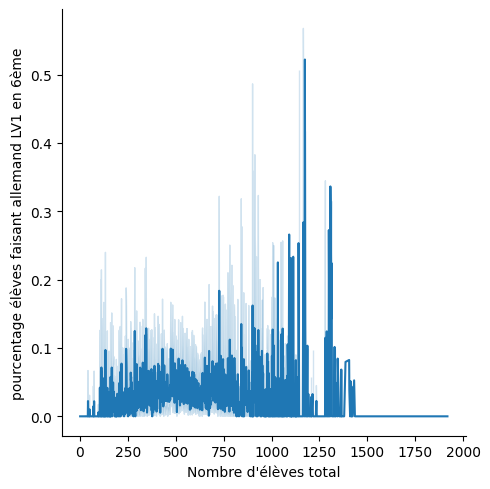

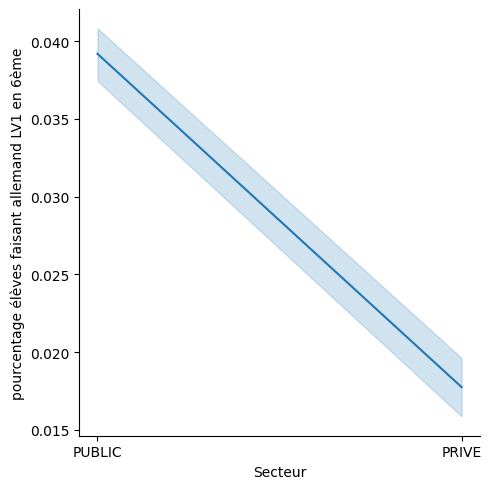

In [46]:
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Nombre d'élèves total",kind="line")
plt.show()
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Secteur",kind="line")
plt.show()

In [ ]:
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Secteur",kind="line")
plt.show()